In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import imdb


In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])
print(decoded_review)

? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

In [5]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(x_train.shape)

(25000, 10000)


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics

In [8]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid'),                    
])

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160016    
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(
    partial_x_train, 
    partial_y_train, 
    epochs=10,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/10
30/30 [==============================] - 1s 30ms/step - loss: 0.5043 - accuracy: 0.7801 - val_loss: 0.3686 - val_accuracy: 0.8739
Epoch 2/10
30/30 [==============================] - 0s 14ms/step - loss: 0.3038 - accuracy: 0.8977 - val_loss: 0.3506 - val_accuracy: 0.8560
Epoch 3/10
30/30 [==============================] - 0s 14ms/step - loss: 0.2319 - accuracy: 0.9245 - val_loss: 0.2862 - val_accuracy: 0.8861
Epoch 4/10
30/30 [==============================] - 0s 13ms/step - loss: 0.1875 - accuracy: 0.9389 - val_loss: 0.2882 - val_accuracy: 0.8857
Epoch 5/10
30/30 [==============================] - 0s 14ms/step - loss: 0.1564 - accuracy: 0.9481 - val_loss: 0.2869 - val_accuracy: 0.8861
Epoch 6/10
30/30 [==============================] - 0s 16ms/step - loss: 0.1351 - accuracy: 0.9562 - val_loss: 0.2964 - val_accuracy: 0.8802
Epoch 7/10
30/30 [==============================] - 0s 14ms/step - loss: 0.1143 - accuracy: 0.9649 - val_loss: 0.3068 - val_accuracy: 0.8783
Epoch 8/10
30

In [13]:
scores = model.evaluate(x_test, y_test, verbose=1)
print ("Правильні відповіді у відсотках", round (scores[1] * 100,2))

782/782 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.8681
Правильні відповіді у відсотках 86.81


In [14]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
import matplotlib.pyplot as plt

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

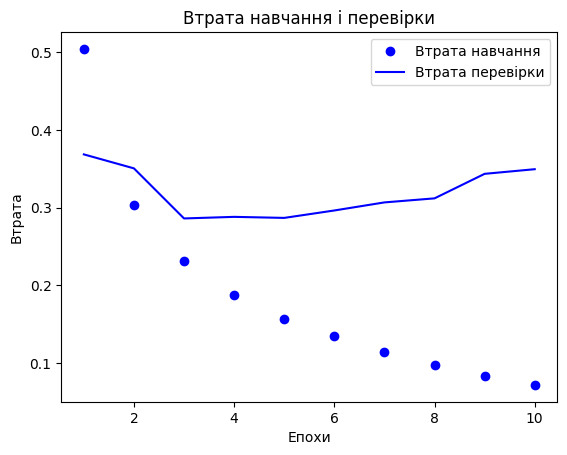

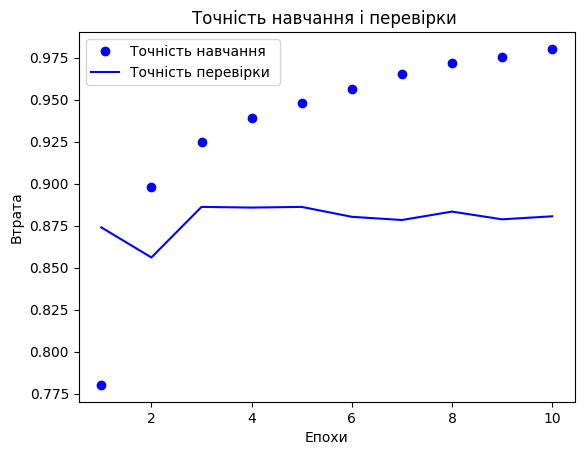

In [18]:
plt.plot(epochs, loss_values, 'bo', label='Втрата навчання')
plt.plot(epochs, val_loss_values, 'b', label='Втрата перевірки')
plt.title('Втрата навчання і перевірки')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Точність навчання ')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Точність перевірки ')
plt.title('Точність навчання і перевірки ')
plt.xlabel('Епохи')
plt.ylabel('Втрата')
plt.legend()

In [19]:
results = model.evaluate(x_test, y_test)
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.3755 - accuracy: 0.8681
[0.37547066807746887, 0.868120014667511]


In [30]:
from keras import layers

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/5
49/49 [==============================] - 2s 9ms/step - loss: 0.4786 - accuracy: 0.8092
Epoch 2/5
49/49 [==============================] - 0s 8ms/step - loss: 0.2823 - accuracy: 0.8980
Epoch 3/5
49/49 [==============================] - 0s 8ms/step - loss: 0.2209 - accuracy: 0.9205
Epoch 4/5
49/49 [==============================] - 0s 8ms/step - loss: 0.1881 - accuracy: 0.9321
Epoch 5/5
782/782 [==============================] - 1s 1ms/step - loss: 0.3025 - accuracy: 0.8801
[0.3025174140930176, 0.880079984664917]


In [31]:
results = model.evaluate(x_test, y_test)
result = model.predict(x_test[0, :].reshape(1, 10000))
print(result)

1/1 [==============================] - 0s 42ms/step
[[0.25364116]]


In [35]:
print (result)

[[0.25364116]]
